# Trabalho 2

### Grupo: Luis Felipe Granado, Thiago Cosme, Pedro Fellipe.



### Questão 1:

Para solucionar o sistema por decomposição LU, primeiro temos que encontrar as matrizes triangulares equivalentes L (com '1's na diagonal principal e zeros acima dela) e U (com zeros abaixo da diagonal principal) tais que o produto matricial LU seja igual a matriz original.


In [44]:
A = [[2.0,3.0,1.0,5.0], 
     [1.0,3.5,1.0,7.5], 
     [1.4,2.7,5.5,12.0],
     [-2.0,1.0,3.0,28.0]] 

n = len(A)     
U=[]  
L=[]  

for i in range(n):
    U.append([0]*n) # Criamos uma lista do mesmo tamanho de A com apenas zeros para preencher com a matriz Upper
    L.append([0]*n) # e fazemos o mesmo para a matriz Lower
    
for m in range(n):  # Aqui execultamos o algoritmo que origina as matrizes L e U
    L[m][m] = 1
    soma = 0   
    
    for k in range(n):
        soma +=  L[m][k]*U[k][m]
    U[m][m] = A[m][m]-soma   
        
    for j in range(m,n):
        soma = 0
        for k in range(m):
            soma +=  L[m][k]*U[k][j]
        U[m][j] = A[m][j]-soma
        
    for i in range(m+1,n):
        soma = 0
        for k in range(m+1):
            soma +=  L[i][k]*U[k][m]
        L[i][m] = (A[i][m]-soma)/U[m][m]

        
print("\n Matriz L: \n")
for i in range(4):
    print (L[i])
    
print("\n Matriz U: \n")
for i in range(4):
    print (U[i])


print("\n Apenas para checagem, testamos o produto LU: \n")

import numpy as np
print(np.dot(L,U))




 Matriz L: 

[1, 0, 0, 0]
[0.5, 1, 0, 0]
[0.7, 0.30000000000000027, 1, 0]
[-1.0, 2.0, 0.6451612903225806, 1]

 Matriz U: 

[2.0, 3.0, 1.0, 5.0]
[0, 2.0, 0.5, 5.0]
[0, 0, 4.65, 6.999999999999998]
[0, 0, 0, 18.483870967741936]

 Apenas para checagem, testamos o produto LU: 

[[ 2.   3.   1.   5. ]
 [ 1.   3.5  1.   7.5]
 [ 1.4  2.7  5.5 12. ]
 [-2.   1.   3.  28. ]]


Assim, sabemos que A = LU.
Agora resolvemos o sistema Ax = b como:
    $$LUx = b$$
chamando Ux de y, temos que resolver dois sistemas triangulares, primeiro: 
$$Ly = b$$
depois:   
$$Ux = y$$

Abaixo, o programa possui duas funções que solucionam os sistemas triangulares com as matrizes L e U.

In [70]:
def vetor_y(L,b):     # Substituição Ly=b
    n = len(L)-1       #os indices correm de 0 ate n-1
    y0 = b[0]/L[0][0]

    y = [0]*len(L)     # cria um vetor de zeros    
    y[0] = y0         # atribui y0 na primeira posicao de y
    
    for i in range(1,n+1,1): # linhas de L a partir da segunda à ultima (incluindo)
        soma = 0
        for j in range(0,i,1): # colunas de L  de 0 à diagonal principal (excluindo)
            soma += y[j]*L[i][j]
        y[i] = (b[i] - soma)
        
    return y
                
    
def vetor_x(U,y):      # Substituição Ux=y
    n = len(U)-1       #os indices correm de 0 ate n-1
    xn = y[n]/U[n][n]

    x = [0]*len(U)     # cria um vetor de zeros    
    x[-1] = xn         # atribui xn na ultima posicao de x
    
    for i in range(n-1,-1,-1): #linhas de U de trás para frente a partir da penultima
        soma = 0
        for j in range(i+1,n+1,1):  #colunas de U a partir da diagonal principal (excluindo)
            soma +=  U[i][j]*x[j]
        x[i] = (y[i] - soma)/U[i][i]
        
    return x


b = [11., 13., 21.6, 30.]

y = vetor_y(L,b)
x = vetor_x(U,y)

print("Vetor solução: ",x)


Vetor solução:  [1.0, 1.0, 1.0000000000000004, 1.0]


### Questão 2 por Gauss-Seidel

No método de Gauss-Seidel criamos um processo iterativo onde isolamos cada termo $x_i$ (o elemento da linha i no vetor x das incógnitas) em função dos elementos restantes.
Em seguida atribuimos um valor inicial ao vetor da incógnitas ([0,0,0,0,0] no nosso caso) e repetimos a iteração várias vezes para todos os $x_i, i = 0, ..., 4$. Se o sistema for convergente $\bigg(\cfrac{1}{|{A_{ii}|}} < 1 ~~ \forall i = 0, ..., 4\bigg)$ a cada iteração os valores do vetor das incógnitas se aproximam da solução exata. 

Criamos uma função para cada valor de $x_i$ já isolado, e no loop atribuímos a cada elemento do vetor x a função $x_i$ usando os demais como argumento, assim a cada iteração o valor é atualizado.


No código, definimos o erro como o maior valor em módulo no vetor da diferença entre o vetor da iteração atual e da anterior  e dividimos pela norma infinita do vetor atual. Pramos o programa quando esse erro fosse menor que 0,00001

In [63]:

import  numpy  as np

x = np.array([0.,0.,0.,0.,0.])
x_ant = np.array([0.,0.,0.,0.,0.])
eps = 0.00001

A = np.array([[6.1,0.32,1.3,2.1,0.11],
                      [0.82,8.81,1.01,3.,3.12],
                      [0.5,1.78,15.2,4.2,8.1],
                      [4.2,5.3,1.8,20.9,7.51],
                      [0.2,9.1,4.68,4.3,20.1]])
b = np.array([19.52, 15.83, -22.14, 27.28, -21.78])

x1 = lambda x2, x3, x4, x5: (b[0] - A[0,1]*x2 - A[0,2]*x3 - A[0,3]*x4 - A[0,4]*x5 )/A[0,0]
x2 = lambda x1, x3, x4, x5: (b[1] - A[1,0]*x1 - A[1,2]*x3 - A[1,3]*x4 - A[1,4]*x5)/A[1,1]
x3 = lambda x1, x2, x4, x5: (b[2] - A[2,0]*x1 - A[2,1]*x2 - A[2,3]*x4 - A[2,4]*x5)/A[2,2]
x4 = lambda x1, x2, x3, x5: (b[3] - A[3,0]*x1 - A[3,1]*x2 - A[3,2]*x3 - A[3,4]*x5)/A[3,3]
x5 = lambda x1, x2, x3, x4: (b[4] - A[4,0]*x1 - A[4,1]*x2 - A[4,2]*x3 - A[4,3]*x4)/A[4,4]
err = 10.

while err>eps:
    
    x[0] = x1(x[1], x[2],x[3], x[4])
    x[1] = x2(x[0], x[2], x[3], x[4])
    x[2] = x3(x[0], x[1], x[3], x[4])
    x[3] = x4(x[0], x[1], x[2], x[4])
    x[4] = x5(x[0], x[1], x[2], x[3])
                                              

    err = np.amax(np.absolute(x-x_ant))/np.amax(np.absolute(x))   
    x_ant = np.copy(x)
    
print ("  \t x1 = ",x[0],
       "\n\t x2 = ",x[1],
       "\n\t x3 = ",x[2],
       "\n\t x4 = ",x[3],
       "\n\t x5 = ",x[4], 
       "\n\n\tErro =",err)

  	 x1 =  3.000001531739661 
	 x2 =  2.0000036469305336 
	 x3 =  -0.9999960282850627 
	 x4 =  0.9999998458572021 
	 x5 =  -2.0000025581207788 

	Erro = 4.591921707271915e-06


### Questão 2 por eliminação de gauss

In [64]:
import numpy as np

M = np.array([[6.1,0.32,1.3,2.1,0.11,19.52],
                      [0.82,8.81,1.01,3.,3.12,15.83],
                      [0.5,1.78,15.2,4.2,8.1,-22.14],
                      [4.2,5.3,1.8,20.9,7.51,27.28],
                      [0.2,9.1,4.68,4.3,20.1,-21.78]])

# Pega o numero de linhas de M
n = len(M)

for j in range(n-1):
    for i in range(j,n-1):
        m = M[i+1,j]/M[j,j]
        M[i+1] = M[i+1]-m*M[j]

        
b = M[0:n+1,n:n+1]   # matriz dos termos independentes     
A = M[0:n+1,0:n]  # matriz dos coeficientes


#funcao para resolver um sistema triangular superior
def solve(U, y):
    n = len(U)-1       #os indices correm de 0 ate n-1
    xn = y[n]/U[n][n]

    x = [0]*len(U)     # cria um vetor de zeros    
    x[-1] = xn         # atribui xn na ultima posicao de x
    
    for i in range(n-1,-1,-1):
        soma = 0
        for j in range(i+1,n+1):
            soma +=  U[i][j]*x[j]
        xi = (y[i]-soma)/U[i][i]
        x[i] = xi
    return x
resposta = solve(A,b)
for i in range (5):
    print ("x",i, "= ", resposta[i])



x 0 =  [3.]
x 1 =  [2.]
x 2 =  [-1.]
x 3 =  [1.]
x 4 =  [-2.]


Comparando os dois métodos acima o de Gauss-Seidel nos dá um a solução aproximada e, aparentemente, é mais custoso computacionalmente graças às diversas iterações, o método de eliminação de Gauss parece mais leve, a solução é exata e não precisa de aproximação incial.

### Questão 3
O problema mostra um arranjo de 4 molas em série sendo comprimidas por uma força F de 2000Kg, o mesmo quer saber a que distancia x, na vertical, que uma mola fica distante da outra.
Como as molas estão em série, a resolução do sistema se dá por iteração, onde a mola 4 fica em função da força F, a mola 3 fica em função da mola 4 e assim sucessivamente.

Para resolver esse sistema computacionalmente, usamos o método de iteração de Jacobi-Richardson, onde a variável que pretende ser encontrada é isolada e resolvida em função das outras variáveis. Numa equação $a_{11}x_1 + a_{12}x_2 +...+ a_{1n}x_n = b_1$, por exemplo, isolamos o $x_1$, ficando $x_1=(1/a_{11})*(b_1-a_{12}x_2-...-a_{1n}x_n)$. Essa iteração é realizada para cada $x_{i+1}$ de cada equação usando o valor de $x_i$ encontrado na iteração anterior. 

Começamos dando um valor inicial de 0 metros de distância para cada mola, a fim de que a cada iteração essa distância  se aproxime da distância exata. O cálculo do erro foi realizado de maneira idêntica à questão 2, com uma tolerancia de 0.000001. 

In [65]:
import numpy as np
x = np.array([0.,0.,0.,0.])
x_ant = np.array([0.,0.,0.,0.])
k = [150.,50.,75.,225.,2000.]
c = 0
erro = 10
x1 = lambda x2, x3, x4: (1/200)*(k[1]*x2 + 0.*x3 + 0.*x4)
x2 = lambda x1, x3, x4: (-1/125)*(-k[1]*x1 -k[2]*x3 + 0.*x4)
x3 = lambda x1, x2, x4: (-1/300)*(0.*x1 -k[2]*x2 -k[3]*x4)
x4 = lambda x1, x2, x3: (1/225)*(k[4]+ 0.*x1 + 0.*x2 + k[3]*x3)

while erro>0.000001:
     x = [x1(x[1],x[2],x[3]), x2(x[0],x[2],x[3]), x3(x[0],x[1],x[3]), x4(x[0],x[1],x[2])]
     c = c+1     
     erro=np.amax(np.absolute(x-x_ant))/np.amax(np.absolute((x)))
     x_ant=np.copy(x)
print ("x1 = %.4f,"%x[0],"x2 = %.4f,"%x[1],"x3 = %.4f,"%x[2], "x4 = %.4f"%x[3], )

x1 = 13.3332, x2 = 53.3326, x3 = 79.9990, x4 = 88.8878


### Questão 4
A solução do problema envolvia analisar o empuxo causado pelo volume submerso do tronco de cone e igualá-lo ao peso do cone inteiro. 

No código criamos a função empuxo - que na verdade é a diferença entre o empuxo do volume submerso e o peso do tronco. Logo, o valor de x que a zera, é o valor da altura procurada. A função V (de volume) auxilia a encontrar o volume de um tronco de cone com raios R, r, e altura h.

E para a solução simplesmente utilizamos o método da bissecção, como a altura pedida só pode estar entre a altura da peça e zero, escolhemos o intervalo entre 0.1 e 1.1 para a procura da raiz.  

In [73]:
import math

a = 0.0                                                   #intervalo para a altura
b = 1.0
erro = 10.

def V(R,r,h):
    return (math.pi*h/3)*(R**2 + r**2 + R*r)

def Empuxo(x):
    return 200*V(1,0.5,1)-1000*V(1,(0.5+x-0.5*x),(1-x))   #Função que compara o peso do tronco com o empuxo do volume submerso

            
while erro > 0.000001:
    x = (a+b)/2
    
    if Empuxo(a)*Empuxo(x) <0:
        b=x
    else:
        a=x
        
    erro = abs(Empuxo(x))
            
print("h =", x)            


h = 0.875777455046773


### Questão 5

No problema, é necessário encontrar uma raiz de uma função de terceiro grau um tanto quanto complicada. Para implementar o método da bissecção fez-se necessário analisar o gráfico da função e localizar um intervalo aproximado para raiz positiva.  
Abaixo utilizamos a biblioteca numpy e a função pyplot para determinar um intervalo razoável.

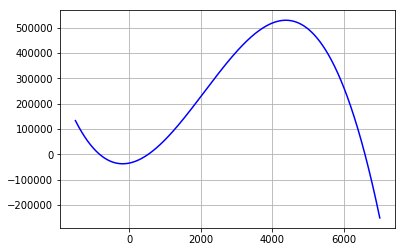

In [67]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

tf = np.arange(-1500,7000, 0.02)
v = lambda tf: 2*8.314*(1.702*(tf-300)+((9.081*10**-3)/2)*(tf**2-300**2)+((-2.164*10**-6)/3)*(tf**3-300**3))-20000
plt.plot(tf, v(tf),"b-")
plt.grid()
plt.show()

A partir da análise desse gráfico, pode-se perceber que a existência de 3 raízes, porém uma negativa que não convém quando se trata de temperatura em Kelvin, uma raiz entre 0 e mil, e outra acima de 6 mil que também não é conveniente, comparando com a temperatura inicial. Logo, definimos o intervalo entre 0 e mil para o método da bissecção.

In [72]:
import math

a = 0                                              #intervalo para a temperatura
b = 1000
erro = 10.

def Q(tf):
    return 2*8.314*(1.702*(tf-300)+((9.081*10**-3)/2)*(tf**2-300**2)+((-2.164*10**-6)/3)*(tf**3-300**3))-20000

while erro > 0.000001:
        x = (a+b)/2
        
        if Q(x)*Q(a) < 0:
             b=x
        else:
            a=x
            
        erro = abs(Q(x))
print("Temperatura final =",x,"K")
            

Temperatura final = 535.4783972143196 K
